# Reaction Time (RT) Analysis by Modality

This notebook analyzes reaction times (RT) recorded during a single trial experiment. Missing responses (coded as RT = -1) have been excluded from analysis.

---

### In this notebook:
- Data cleaning
- Summary statistics per modality
- RT distribution visualizations


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("../res/expdata/trials/subject_0.csv")
df['RT'] = np.where(df['RT'] == -1, np.nan, df['RT'])

# Drop missing RTs for analysis
df_clean = df.dropna(subset=['RT'])

df_clean.head()

,target,modality,RT
0,68-scenes\bridge-68\beach_07_06_flickr.jpg,control,1.667857
1,68-scenes\castle-68\FreeFoto_castle_23_3.jpg,medium-low,2.923887
2,68-scenes\skyscraper-68\a212044.jpg,control,1.425862
3,68-scenes\castle-68\FreeFoto_castle_3_9.jpg,medium,2.671390
4,68-scenes\house-68\house_08_03_askl.jpg,medium-low,1.760246


## Summary Statistics of RT by Modality

In [2]:
# Compute mean, median, std, and count
modality_order = ['high', 'medium', 'medium-low', 'medium', 'low', 'control']
df_ordered = (
    df_clean.groupby('modality')['RT']
    .agg(['count', 'mean', 'median', 'std'])
    .reindex(modality_order)
)
df_ordered

,count,mean,median,std
modality,,,,
high,5,2.704227,2.565018,0.963384
medium,5,2.267256,2.096083,0.850428
medium-low,5,2.399643,2.557230,0.503079
medium,5,2.267256,2.096083,0.850428
low,5,2.111830,1.803720,0.640544
control,5,1.965622,1.873563,0.510515


## RT Distribution by Modality

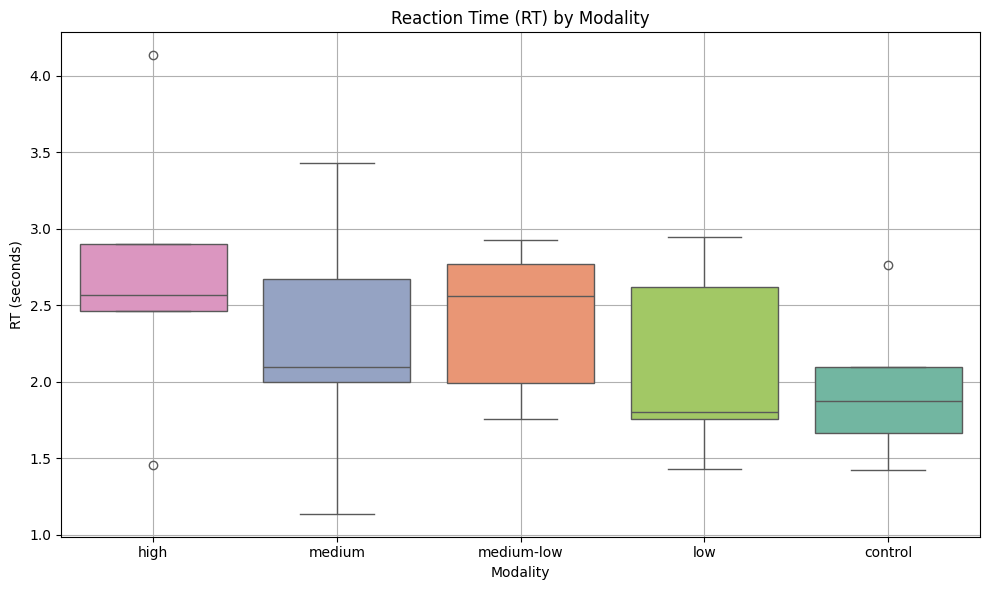

In [ ]:
modality_order = ['high', 'medium', 'medium-low', 'low', 'control']
palette = sns.color_palette("Set2", n_colors=len(modality_order))

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x='modality',
    y='RT',
    hue='modality',          # add this to link colors to modality
    order=modality_order,
    palette=palette,
    dodge=False,             # prevent duplicated boxes
    legend=False             # hide redundant legend
)
plt.title("Reaction Time (RT) by Modality")
plt.ylabel("RT (seconds)")
plt.xlabel("Modality")
plt.grid(True)
plt.tight_layout()
plt.show()

## Kruskal-Wallis Test

We performed a Mann-Whitney U test to assess whether the RT distributions differ significantly across modalities.

In [ ]:
# Import combinations (previously used, but not in this active kernel)
from itertools import combinations
from scipy.stats import mannwhitneyu

# Redo unpaired test using clean dataset
modalities = ['control', 'high', 'medium', 'medium-low', 'low']

unpaired_results = []
for mod1, mod2 in combinations(modalities, 2):
    group1 = df_clean[df_clean['modality'] == mod1]['RT'].dropna()
    group2 = df_clean[df_clean['modality'] == mod2]['RT'].dropna()
    if not group1.empty and not group2.empty:
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        unpaired_results.append((mod1, mod2, stat, p))

# Format results
unpaired_df = pd.DataFrame(unpaired_results, columns=["Modality 1", "Modality 2", "U-statistic", "p-value"])
unpaired_df["Significant (p < 0.05)"] = unpaired_df["p-value"] < 0.05
unpaired_df.sort_values("p-value", inplace=True)

unpaired_df


,Modality 1,Modality 2,U-statistic,p-value,Significant (p < 0.05)
0,control,high,6.0,0.222222,False
2,control,medium-low,6.0,0.222222,False
4,high,medium,16.0,0.547619,False
6,high,low,16.0,0.547619,False
9,medium-low,low,16.0,0.547619,False
1,control,medium,10.0,0.690476,False
8,medium,low,15.0,0.690476,False
3,control,low,11.0,0.841270,False
5,high,medium-low,14.0,0.841270,False
7,medium,medium-low,12.0,1.000000,False
